# Make adjective-noun phrases

Now that we have a cleaned list of concrete and abstract words, we can work on constructing phrases. 

In [1]:
import os
import random

import re
import requests

import numpy as np
import pandas as pd
from scipy import stats

from datetime import date

import matplotlib.pyplot as plt
import seaborn as sns

dir = 'U:\ownCloud\projects\FakeDiamond\stimuli'

## Adjectives

We are interested in studying whether the conceptual semantic system is sensitive to one kind of fine-grained distinction studied in linguistic semantics, called denotational semantics. Denotational semantics are driven by subsective adjectives (e.g., good, typical) and non-subsective adjectives (e.g., fake, former). The contrast in denotation arises only when the adjective composes with a noun. For example, a "typical diamond" is a diamond, while a "fake diamond" is not a diamond.

We start with non-subsective adjectives because they are more sparsely distributed in natural language. [Nayak and colleagues (2014)](https://www.cis.upenn.edu/~ccb/publications/non-subsective-adjectives.pdf) compiled a list of non-subsective adjectives. We focused on the privative kind, which has a list of 24 adjectives. We then removed adjectives for which we don't have readily available frequency measures (e.g., anti-, ex-, pseudosimulated, adjectives we think are archaic (e.g., erstwhile), and adjectives we think doesn't go well with our nouns (e.g., onetime, deputy). This results in the following 16 privative, non-subsective, adjectives.

In [2]:
adjectives_privative = ['artificial','counterfeit','fabricated','fake','false','fictional','fictitious','former',
                        'hypothetical','imaginary','mock','mythical','past','phony','spurious','virtual'] 

Subsective adjectives are much easier to find. We started with a list of adjectives (n=300) compiled by Lalisse and Asudeh (2015). We then used their classification of subsectives to narrow down to the same number of non-subsective adjectives we obtained above (n=16) that we think would go well with a wide array of concrete and abstract nouns. 

In [3]:
adjectives_subsective = ['actual','authentic','average','bad','current','genuine','good','important',
                         'new','old','perfect','real','special','true','typical','unique']

As single word baselines, we follow Bemis and Pylkkanen (2011) in using unpronounceable consonant strings as 'adjectives', the rationale being that these serves to engage the visual system from bottom-up to roughly the same extent as when it encounters actual adjectives.

In [4]:
consonant_strings = ['xkq', 'qxsw', 'mtpv', 'rjdnw', 'wvcnz', 'zbxlv','tqvgqrz', 'bxfjwts','mghljkqr',
                     'kmlsdjtw','ptrgsbkv','zrtqgfplh','vpbyzkgrf','htbqzylm','ypdcglkc','fxldmr','rvqf']

baselines = pd.DataFrame(consonant_strings, columns=['adjective'])
baselines['length'] = baselines['adjective'].str.len()
baselines.reset_index(drop=True, inplace=True)
print('Mean length: ', baselines.length.mean())
print('Std length: ', baselines.length.std())

Mean length:  6.352941176470588
Std length:  1.9666334327534274


# Phrases

For each condition (subsective, privative, single-word baseline), we take the list of relevant adjectives and repeat them. Specifically, we aim to repeat the nouns such that each adjective combines with the nouns with roughly the same frequency. We then shuffled the order of adjectives. 

Prepare adjective lists: repeating the adjectives into a list, shuffling the lists

In [5]:
# read in our cleaned list of nouns 
nouns = pd.read_csv(os.path.join(dir, 'concreteness_denotation/2_nouns_cleaned.csv'))

# create an array of adjectives to be concatenated with the noun dataframe
array_adjectives = np.empty((3, len(nouns)), dtype='object') # initialise array
for i, adjectives in enumerate([adjectives_subsective,adjectives_privative,consonant_strings]):
    adjectives_repeated = (adjectives * 19)[:len(nouns)]
    adjectives_repeated_shuffled = random.Random(42).sample(adjectives_repeated, len(adjectives_repeated)) # create random.Random instance for reproducibility
    array_adjectives[i] = adjectives_repeated_shuffled
    
# transpose and flatten to put into big df later
adjectives_all = np.transpose(array_adjectives).flatten()

Prepare the noun dataframe: repeat each noun 3 times, because there are 3 'adjective' conditions.

In [6]:
# repeat critical nouns 3 times for 3 denotation conditions
stimuli = pd.DataFrame(np.repeat(nouns.values, 3, axis=0)) 
stimuli.columns = nouns.columns # assign column names 
stimuli['denotation'] = ['subsective','privative','baseline'] * len(nouns) # add denotation condition

Put nouns and adjectives into one big dataframe

In [7]:
stimuli['adjective'] = adjectives_all
stimuli['phrase'] = stimuli.adjective + ' ' + stimuli.noun
stimuli

,noun,set_nr,concreteness,Zipf,Length,Syllables,Phonemes,AoA,CNC_M,Valence,RT,CNC_SD,IMAG,denotation,adjective,phrase
0,sulphur,1,concrete,3.351834,7,2,5,6,4.23,4.7647,668.25,1.25,4.727,subsective,old,old sulphur
1,sulphur,1,concrete,3.351834,7,2,5,6,4.23,4.7647,668.25,1.25,4.727,privative,imaginary,imaginary sulphur
2,sulphur,1,concrete,3.351834,7,2,5,6,4.23,4.7647,668.25,1.25,4.727,baseline,tqvgqrz,tqvgqrz sulphur
3,longing,1,abstract,3.408385,7,2,5,8,2.14,4.303,679.666667,1.13,3.235,subsective,special,special longing
4,longing,1,abstract,3.408385,7,2,5,8,2.14,4.303,679.666667,1.13,3.235,privative,past,past longing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,syringe,137,concrete,3.122247,7,2,5,10,4.81,3.4375,675.194444,0.57,6.4,privative,fictional,fictional syringe
818,syringe,137,concrete,3.122247,7,2,5,10,4.81,3.4375,675.194444,0.57,6.4,baseline,zbxlv,zbxlv syringe
819,wrath,137,abstract,3.409226,5,1,3,12,2.42,2.6364,627.324324,1.33,2.875,subsective,old,old wrath
820,wrath,137,abstract,3.409226,5,1,3,12,2.42,2.6364,627.324324,1.33,2.875,privative,imaginary,imaginary wrath


In [8]:
stimuli[['Zipf','CNC_M']] = stimuli[['Zipf','CNC_M']].astype(float)

In [9]:
from scipy import stats

test_stim = stimuli[::3]
test_stim
stats.ttest_ind(test_stim.query('concreteness=="concrete"')['CNC_M'], test_stim.query('concreteness=="abstract"')['CNC_M'])

Ttest_indResult(statistic=74.90759890285206, pvalue=1.3455400127986753e-183)

# Calculate phrasal statistics

In [23]:
# parameters for Google Books Ngram
corpus = 'eng-GB-2019' # British English
startYear, endYear = 1919, 2019 # most recent 100 years available on Google Books Ngram
smoothing = 3 # for extrapolating in case there's missing; this is default setting 
caseInsensitive = True 

print(f'Calculating bigram frequency...')
frequencies_dep = [] # dependency frequency
frequencies_seq = [] # sequence frequency
frequencies_all = [frequencies_dep, frequencies_seq] # for looping
for index, row in stimuli.iterrows():
    query_w2w1 = row.noun + '_NOUN' + '=>' + row.adjective + '_ADJ' # dependency frequency
    query_w1w2 = row.adjective + '_ADJ' + ' ' + row.noun + '_NOUN' # sequence frequency
    queries = [query_w2w1, query_w1w2] # for looping

    for query, frequencies in zip(queries, frequencies_all):
        params = dict(content=query, year_start=startYear, year_end=endYear,
                      corpus=corpus, smoothing=smoothing,
                      case_insensitive=caseInsensitive)
        req = requests.get('http://books.google.com/ngrams/graph', params=params)
        res = re.findall('"timeseries": \[(.*?)\]}', req.text) # find timeseries associated with each query
        if res: 
            timeseries = list(map(float, res[0].split(','))) 
            average_frequency = sum(timeseries) / len(timeseries) # calculate mean frequency across time
            frequencies.append(average_frequency)
        else: 
            frequencies.append(0)
#     print(str(index+1) + ' out of ' + str(len(phrases)) + ' done.')
stimuli['frequency_dep'] = frequencies_dep
stimuli['frequency_seq'] = frequencies_seq
# phrases.to_csv(os.path.join(f'phrases_bigramFreq_{date.today()}.csv'), index=False)

# calculate log frequencies 
stimuli['frequency_dep_log'] = np.log10(stimuli['frequency_dep'])
stimuli['frequency_seq_log'] = np.log10(stimuli['frequency_seq'])
print('Done.')

Calculating bigram frequency...
Done.


C:\Users\rl05\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\rl05\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


After testing the script in the scanner, with a long enough inter-trial interval for cortical activations to return to baseline (\~2s), the experiment would be too long (\~1.5hrs effective recording time; longer with setting up and brief breaks between blocks). We decided to reduce the number of trials per condition to 100, yielding 900 trials total (effective recording time \~43 minutes). Below we document how we reduce the number of trials. 

Drop 37 sets of items to keep the total number of sets to 100 (i.e., 100 trials per condition). We do this by calculating the sum of bigram frequencies in each set, then keeping the sets with positive non-zero summed frequencies. Out of the sets with zero frequencies, we randomly sample 37 to be removed.

In [25]:
stimuli = pd.read_excel('3_phrases_2023-06-27.xlsx', index_col=None)

# sum frequencies in each set and keep track
aggregate_frequency = []
for i in stimuli.set_nr.unique():
    aggregate_frequency.append(stimuli.loc[stimuli.set_nr == i].frequency_dep.sum())
stimuli_copy = stimuli.copy()

# for sets with zero aggregate frequency, sample 37 for removal
stimuli_copy = stimuli_copy[::6]
stimuli_copy['aggregate_frequency'] = aggregate_frequency
sets_to_be_removed = stimuli_copy[stimuli_copy.aggregate_frequency == 0]['set_nr'].sample(37, random_state=42) 
print(f'Sets to be removed: (n={len(sets_to_be_removed)})', sets_to_be_removed.tolist())

stimuli = stimuli[~stimuli['set_nr'].isin(sets_to_be_removed)]
print(f'Total number of trials: {len(stimuli)}')
stimuli

Sets to be removed: (n=37) [53, 78, 17, 60, 55, 82, 39, 24, 23, 57, 86, 68, 81, 110, 13, 31, 66, 93, 116, 104, 49, 25, 44, 79, 103, 75, 35, 98, 94, 90, 28, 43, 58, 22, 46, 69, 77]
Total number of trials: 600


,Unnamed: 0,noun,set_nr,concreteness,Zipf,Length,Syllables,Phonemes,AoA,CNC_M,...,RT,CNC_SD,IMAG,denotation,adjective,phrase,frequency_dep,frequency_seq,frequency_dep_log,frequency_seq_log
0,0,sulphur,1,concrete,3.351834,7,2,5,6,4.23,...,668.250000,1.25,4.727,subsective,old,old sulphur,5.791099e-10,1.709172e-09,-9.237239,-8.767214
1,1,sulphur,1,concrete,3.351834,7,2,5,6,4.23,...,668.250000,1.25,4.727,privative,imaginary,imaginary sulphur,0.000000e+00,0.000000e+00,-inf,-inf
2,2,sulphur,1,concrete,3.351834,7,2,5,6,4.23,...,668.250000,1.25,4.727,baseline,tqvgqrz,tqvgqrz sulphur,0.000000e+00,0.000000e+00,-inf,-inf
3,3,longing,1,abstract,3.408385,7,2,5,8,2.14,...,679.666667,1.13,3.235,subsective,special,special longing,6.415080e-10,5.920740e-10,-9.192798,-9.227624
4,4,longing,1,abstract,3.408385,7,2,5,8,2.14,...,679.666667,1.13,3.235,privative,past,past longing,2.164082e-10,1.657856e-10,-9.664726,-9.780453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,817,syringe,137,concrete,3.122247,7,2,5,10,4.81,...,675.194444,0.57,6.400,privative,fictional,fictional syringe,0.000000e+00,0.000000e+00,-inf,-inf
818,818,syringe,137,concrete,3.122247,7,2,5,10,4.81,...,675.194444,0.57,6.400,baseline,zbxlv,zbxlv syringe,0.000000e+00,0.000000e+00,-inf,-inf
819,819,wrath,137,abstract,3.409226,5,1,3,12,2.42,...,627.324324,1.33,2.875,subsective,old,old wrath,0.000000e+00,0.000000e+00,-inf,-inf
820,820,wrath,137,abstract,3.409226,5,1,3,12,2.42,...,627.324324,1.33,2.875,privative,imaginary,imaginary wrath,0.000000e+00,0.000000e+00,-inf,-inf


Save this list of phrases to disk for to make comprehension questions.

In [26]:
stimuli.to_excel(f'3_phrases_{date.today()}.xlsx', index=False)

# Visualise distribution of psycholinguistic features

In [16]:
def compute_stats(feature, contrast):
    if contrast == 'concreteness':
        t_stats = stats.ttest_ind(data_concreteness.query('concreteness=="concrete"')[feature], data_concreteness.query('concreteness=="abstract"')[feature], nan_policy='omit')
    elif contrast == 'denotation':
        t_stats = stats.ttest_ind(data_denotation.query('denotation=="subsective"')[feature], data_denotation.query('denotation=="privative"')[feature], nan_policy='omit')
    return t_stats

C:\Users\rl05\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1218: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - mean
C:\Users\rl05\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:6111: RuntimeWarning: invalid value encountered in double_scalars
  d = mean1 - mean2


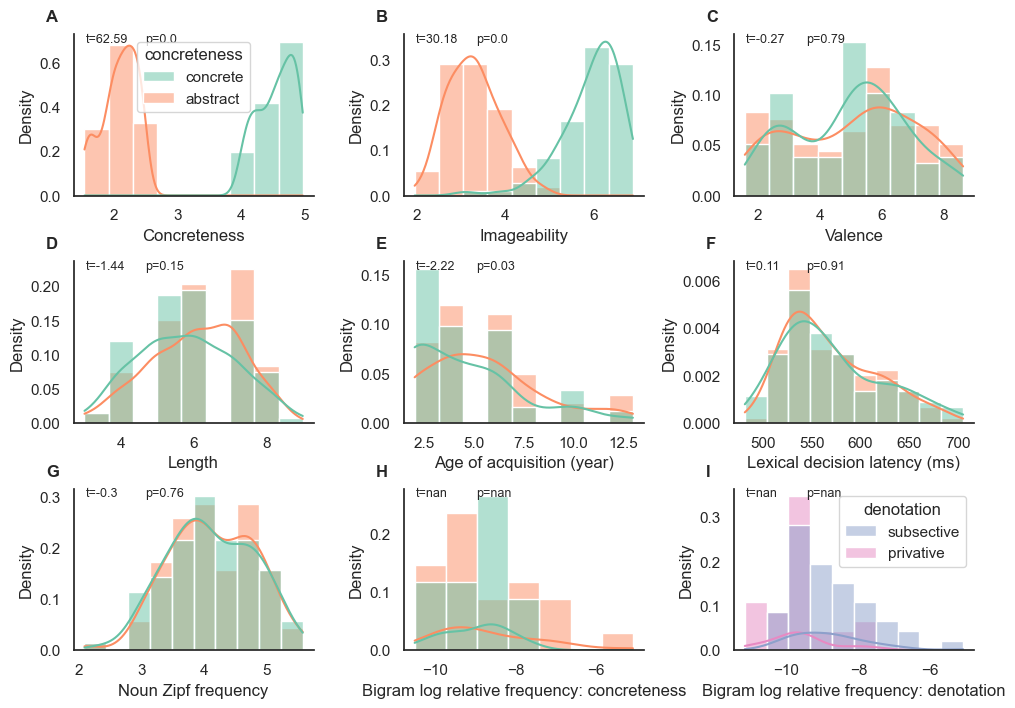

In [20]:
data_concreteness = stimuli.iloc[0::3] # select every 3 rows to get noun features
data_denotation = stimuli.query('denotation == "subsective" | denotation == "privative"')

fig, axes = plt.subplots(3, 3, figsize=(10,7))
sns.set_context(font_scale=1)
sns.set_theme(style='white', palette='Set2')

sns.histplot(x='CNC_M', hue='concreteness', data=data_concreteness, ax=axes[0,0], stat='density', kde=True).set_xlabel('Concreteness')
sns.histplot(x='IMAG', hue='concreteness', data=data_concreteness, ax=axes[0,1], stat='density', kde=True).set_xlabel('Imageability')
sns.histplot(x='Valence', hue='concreteness', data=data_concreteness, ax=axes[0,2], stat='density', kde=True).set_xlabel('Valence')

sns.histplot(x='Length', hue='concreteness', data=data_concreteness, ax=axes[1,0], stat='density', kde=True)
sns.histplot(x='AoA', hue='concreteness', data=data_concreteness, ax=axes[1,1], stat='density', kde=True).set_xlabel('Age of acquisition (year)')
sns.histplot(x='RT', hue='concreteness', data=data_concreteness, ax=axes[1,2], stat='density', kde=True).set_xlabel('Lexical decision latency (ms)')

sns.histplot(x='Zipf', hue='concreteness', data=data_concreteness, ax=axes[2,0], stat='density', kde=True).set_xlabel('Noun Zipf frequency')
sns.histplot(x='frequency_seq_log', hue='concreteness', data=data_concreteness, ax=axes[2,1], stat='density', kde=True).set_xlabel('Bigram log relative frequency: concreteness')
sns.histplot(x='frequency_seq_log', hue='denotation', data=data_denotation, ax=axes[2,2], stat='density', kde=True, palette=['C2','C3']).set_xlabel('Bigram log relative frequency: denotation')

fig.tight_layout()
sns.despine()

# remove legend for some subplots
for ax in axes.ravel()[1:-1]:
    ax.legend([],[], frameon=False)
    
# add statistics comparing high and low specificity nouns 
for ax, feature in zip(axes.ravel()[:-2],['CNC_M','IMAG','Valence','Length','AoA','RT','Zipf']):
    t_stats = compute_stats(feature, contrast='concreteness')
    ax.annotate(f't={round(t_stats[0],2)}', xy=(0.05, 0.95), xycoords='axes fraction', transform=ax.transAxes, fontsize=9)
    ax.annotate(f'p={round(t_stats[1],2)}', xy=(0.3, 0.95), xycoords='axes fraction', transform=ax.transAxes, fontsize=9)
for ax, feature in zip(axes.ravel()[-2:],['frequency_seq_log','frequency_seq_log']):
    t_stats = compute_stats(feature, contrast='denotation')
    ax.annotate(f't={round(t_stats[0],2)}', xy=(0.05, 0.95), xycoords='axes fraction', transform=ax.transAxes, fontsize=9)
    ax.annotate(f'p={round(t_stats[1],2)}', xy=(0.3, 0.95), xycoords='axes fraction', transform=ax.transAxes, fontsize=9)
    
import matplotlib.transforms as mtransforms
for ax, label in zip(axes.ravel(), 'ABCDEFGHI'):
    # label physical distance to the left and up:
    trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, label, transform=ax.transAxes + trans, fontsize='medium', va='bottom', fontweight='bold')